In [6]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd

import utils.MAGic_Avocado_utils as magic

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### 5. **Análisis de Correlación y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

In [8]:
# Carga el dataset
df_orig = pd.read_csv("./dataset/avocado.csv")
df_orig

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [9]:
# Copia del dataframe para preservar datos originales
df = df_orig.copy()

In [10]:
# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['cat_region'] = df['region'].transform(lambda x: magic.get_truly_region(x))
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,cat_region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region


In [11]:
# Convierte 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# Prepara filtro de filas para tener en cuenta sólo verdaderamente GreaterRegion
greater_regions = df[df['cat_region']=='GreaterRegion']
greater_regions.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,cat_region
312,0,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California,GreaterRegion
313,1,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California,GreaterRegion
314,2,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California,GreaterRegion
315,3,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California,GreaterRegion
316,4,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California,GreaterRegion


1. **Matriz de Correlación:** 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.

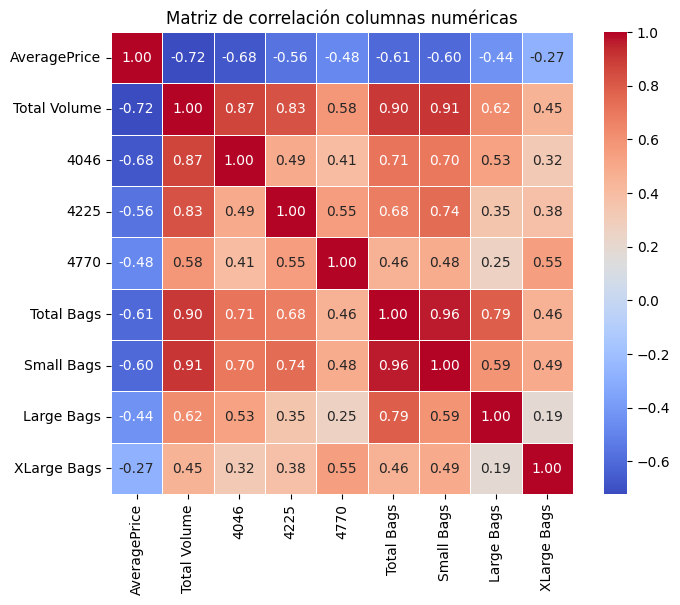

In [13]:
df_corr=greater_regions[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' ]]
matriz_corr=df_corr.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación columnas numéricas')
plt.show()

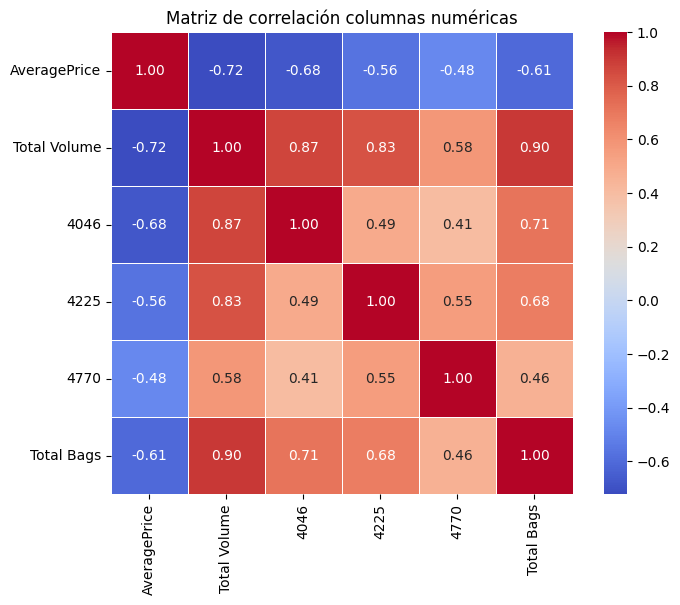

In [14]:
#Sabemos que Total Bags es la combinación de Small Bags, Large Bags i XLarge Bags, así que sacamos esas tres y dejamos solo Total Bags
df_corr2=greater_regions[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags' ]]
matriz_corr2=df_corr2.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(matriz_corr2, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación columnas numéricas')
plt.show()

Podemos ver que el total volume está altamente correlacionado con el total vags y también la variedad 4046 y 4225. Esto es porque seguramente la venta de las variedades de aguacate (4046, 4225) definen mayormente junto con las total bags el volumen de ventas.

El hecho de que estas variables esten altamente correlacionadas puede influir en el estudio dado que los modelos de regresión lineal con alta correlación entre sus variables pueden resultar altamente inestables, generar errores numéricos y un rendimiento de predicción muy deficiente. 

2. **Análisis de Dispersión entre Variables Clave:** 
   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.

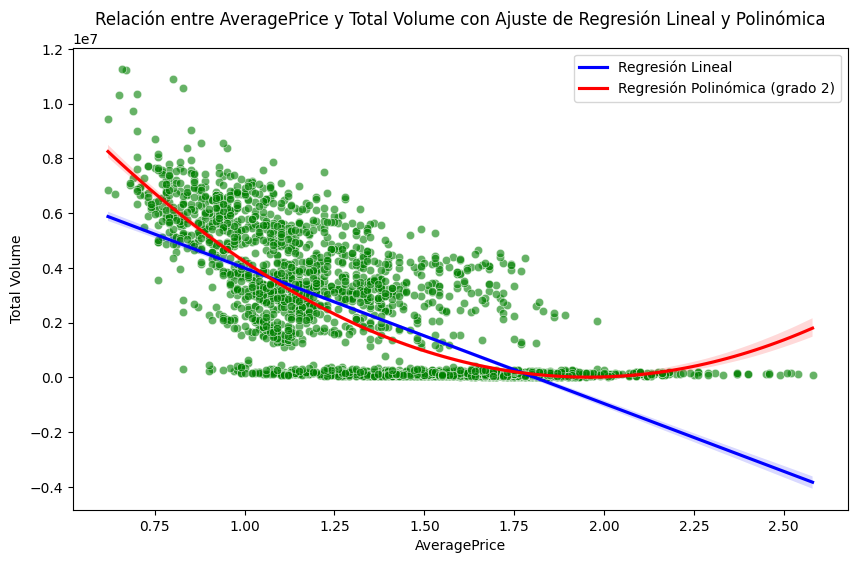

In [15]:
df_dispersion=greater_regions[['Total Volume', 'AveragePrice']]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dispersion, x='AveragePrice', y='Total Volume', alpha=0.6, color='green')

#Añadimos una linea de regresión para ilustrar tendencias. Scatter=False para evitar superponer puntos de dispersion adicionales
sns.regplot(data=df_dispersion, x='AveragePrice', y='Total Volume', scatter=False, label="Regresión Lineal", color="blue")

#Vamos a graficar también la regresión polinómica de segundo grado (cuadrática) para contrastarla
sns.regplot(data=df_dispersion, x='AveragePrice', y='Total Volume', scatter=False, label="Regresión Polinómica (grado 2)", color="red", order=2)

# Personalización del gráfico
plt.title("Relación entre AveragePrice y Total Volume con Ajuste de Regresión Lineal y Polinómica")
plt.legend()
plt.show()

Podríamos concluir que la regresión polinómica de grado 2 es más ajustada, sobretodo en valores de AveragePrice mayores de 1.75


3. **Predicciones Mensuales Usando Datos Trimestrales:**
   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [16]:
df_prediccion_M=greater_regions[['Date', 'AveragePrice', 'Total Volume']]
#Date ya es datatime
#Agrupamos por trimestres
#Las agrupamos por trimestres (Q) y para average price hacemos la media y para total volume la media también
agrup_Q=df_prediccion_M.groupby(pd.Grouper(key='Date', freq='Q')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'})

agrup_Q.head()

/tmp/ipykernel_78170/2272704612.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  agrup_Q=df_prediccion_M.groupby(pd.Grouper(key='Date', freq='Q')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'})


,AveragePrice,Total Volume
Date,,
2015-03-31,1.303269,2.003434e+06
2015-06-30,1.344087,2.200042e+06
2015-09-30,1.408798,2.007397e+06
2015-12-31,1.313654,1.756701e+06
2016-03-31,1.200481,2.347942e+06


In [17]:
#Para poder tomar los datos de los primeros dos meses y comparar la predicción con lo real separaremos lo datos por meses.
# Convertir los datos en frecuencia mensual (M)
df_mensual = df_prediccion_M.groupby(pd.Grouper(key='Date', freq='M')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'})
df_mensual.head()

/tmp/ipykernel_78170/1188253582.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df_prediccion_M.groupby(pd.Grouper(key='Date', freq='M')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'})


,AveragePrice,Total Volume
Date,,
2015-01-31,1.313125,1.882086e+06
2015-02-28,1.274375,2.148491e+06
2015-03-31,1.318500,1.984466e+06
2015-04-30,1.353125,2.039883e+06
2015-05-31,1.317000,2.284402e+06


In [18]:
#Tomamos los dos primeros meses de cada Trimestre para predecir el tercero.
# Crear listas para almacenar predicciones
predicciones_avg_price = []
predicciones_total_volume = []
fechas_prediccion = []

# Para cada año que tengamos vamos a cada trimestre (a los 4 que hay dentro de cada año)
for year in df_mensual.index.year.unique():
    for quarter in range(1, 5):  # Cuatro trimestres en un año
        # Cogemos los meses del trimestre actual donde entramos
        trimestre = df_mensual[(df_mensual.index.year == year) & (df_mensual.index.quarter == quarter)]
        
        # Si hay al menos tres meses en el trimestre, procedemos (si hay menos no puede predecir)
        if len(trimestre) == 3:
            # Calcular la media de los primeros dos meses del trimestre para usarla como prediccion
            promedio_avg_price = trimestre['AveragePrice'][:2].mean()
            promedio_total_volume = trimestre['Total Volume'][:2].mean()
            
            # Guardar la predicción para el tercer mes del trimestre
            predicciones_avg_price.append(promedio_avg_price)
            predicciones_total_volume.append(promedio_total_volume)
            fechas_prediccion.append(trimestre.index[2])  # Fecha del mes que corresponden a esta predicción

# DataFrame para guardar las predicciones
df_predicciones = pd.DataFrame({
    'Date': fechas_prediccion,
    'Predicted_AveragePrice': predicciones_avg_price,
    'Predicted_TotalVolume': predicciones_total_volume
}).set_index('Date')

df_predicciones

,Predicted_AveragePrice,Predicted_TotalVolume
Date,,
2015-03-31,1.293750,2.015289e+06
2015-06-30,1.335062,2.162142e+06
2015-09-30,1.400609,2.044081e+06
2015-12-31,1.334984,1.767240e+06
2016-03-31,1.204016,2.381730e+06
2016-06-30,1.169094,2.510839e+06
2016-09-30,1.367203,2.197548e+06
2016-12-31,1.524813,1.613489e+06
2017-03-31,1.187937,2.651117e+06


In [19]:
# Extraer datos reales del tercer mes de cada trimestre, los months en posicion 3, 6, 9 y 12.
tercer_mes_reales = df_mensual[df_mensual.index.month.isin([3, 6, 9, 12])]

# Unir el DataFrame de predicciones con los datos reales usando las fechas como índice.
# inner es para q solo se quede con las filas q tienen mismo indice en ambos df.
df_comparacion = df_predicciones.join(tercer_mes_reales, how='inner')

# Visualización de los datos comparados
df_comparacion

,Predicted_AveragePrice,Predicted_TotalVolume,AveragePrice,Total Volume
Date,,,,
2015-03-31,1.293750,2.015289e+06,1.318500,1.984466e+06
2015-06-30,1.335062,2.162142e+06,1.368906,2.254751e+06
2015-09-30,1.400609,2.044081e+06,1.421875,1.941528e+06
2015-12-31,1.334984,1.767240e+06,1.275313,1.741298e+06
2016-03-31,1.204016,2.381730e+06,1.190625,2.307607e+06
2016-06-30,1.169094,2.510839e+06,1.248125,2.421648e+06
2016-09-30,1.367203,2.197548e+06,1.395469,2.136636e+06
2016-12-31,1.524813,1.613489e+06,1.259531,1.952924e+06
2017-03-31,1.187937,2.651117e+06,1.318125,2.119955e+06


In [20]:
# Comparar los valores entre el valor predicho y el valor real


df_comparacion['Error Porcentual AV'] = ((df_comparacion['AveragePrice'] - df_comparacion['Predicted_AveragePrice']) / df_comparacion['AveragePrice']) * 100
df_comparacion['Error Porcentual TV'] = ((df_comparacion['Total Volume'] - df_comparacion['Predicted_TotalVolume']) / df_comparacion['Total Volume']) * 100

df_comparacion[['Error Porcentual AV', 'Error Porcentual TV']]

,Error Porcentual AV,Error Porcentual TV
Date,,
2015-03-31,1.877133,-1.553181
2015-06-30,2.472321,4.107285
2015-09-30,1.495604,-5.282029
2015-12-31,-4.679000,-1.489849
2016-03-31,-1.124672,-3.212093
2016-06-30,6.331998,-3.683068
2016-09-30,2.025529,-2.850842
2016-12-31,-21.061903,17.380850
2017-03-31,9.876719,-25.055349


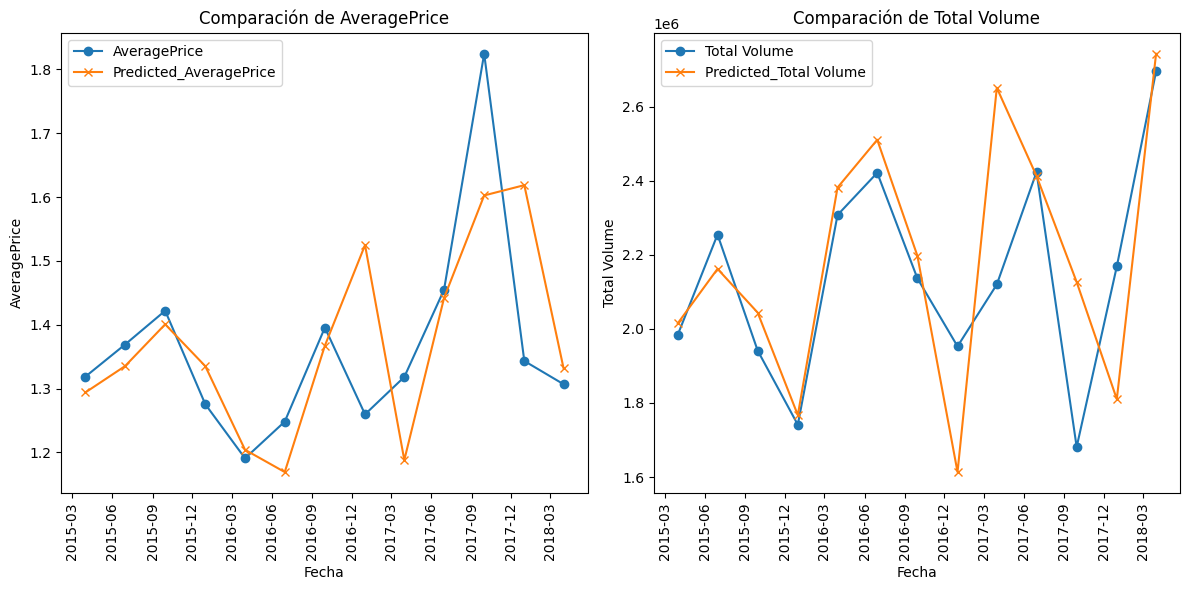

In [21]:

#Para poder ver mejor la diferencia entre ellos lo haremos mediante un gráfico que muestre ambos valores
plt.figure(figsize=(12, 6))

# AveragePrice
plt.subplot(1, 2, 1)
plt.plot(df_comparacion.index, df_comparacion['AveragePrice'], marker='o', label='AveragePrice')
plt.plot(df_comparacion.index, df_comparacion['Predicted_AveragePrice'], marker='x', label='Predicted_AveragePrice')
plt.title("Comparación de AveragePrice")
plt.xlabel("Fecha")
plt.ylabel("AveragePrice")
plt.xticks(rotation=90)
plt.legend()

# Configurar el eje x para mostrar solo los meses de los trimestres
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[3, 6, 9, 12]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Total Volume
plt.subplot(1, 2, 2)
plt.plot(df_comparacion.index, df_comparacion['Total Volume'], marker='o', label='Total Volume')
plt.plot(df_comparacion.index, df_comparacion['Predicted_TotalVolume'], marker='x', label='Predicted_Total Volume')
plt.title("Comparación de Total Volume")
plt.xlabel("Fecha")
plt.ylabel("Total Volume")
plt.xticks(rotation=90)
plt.legend()

# Configurar el eje x para que muestre solo los trimestres
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[3, 6, 9, 12]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()



In [22]:
#Para evaluar numéricamente la precisión de las predicciones usaremos RSME y R^2
#error para AveragePrice
r2_avg_price = r2_score(df_comparacion['AveragePrice'], df_comparacion['Predicted_AveragePrice'])
rmse_avg_price = root_mean_squared_error(df_comparacion['AveragePrice'], df_comparacion['Predicted_AveragePrice'])

#error para Total Volume
r2_total_volume = r2_score(df_comparacion['Total Volume'], df_comparacion['Predicted_TotalVolume'])
rmse_total_volume = root_mean_squared_error(df_comparacion['Total Volume'], df_comparacion['Predicted_TotalVolume'])


print("\nPrecisión para predicción del AveragePrice:")
print("R^2:", r2_avg_price)
print("RMSE:", rmse_avg_price)

print("\nPrecisión para predicción del Total Volume:")
print("R^2:", r2_total_volume)
print("RMSE:", rmse_total_volume)


Precisión para predicción del AveragePrice:
R^2: 0.23245487981728286
RMSE: 0.13193700337310427

Precisión para predicción del Total Volume:
R^2: 0.2191950948175202
RMSE: 242484.81217245324


Para AveragePrice hay una variación de 0.132 aprox. en el precio predecido, dado que los precios varian entre 1 y 2 $ es una precisión baja. El R^2 cercano al cero nos indica también q el modelo de predicción usado (la media) no es muy bueno.

Para Total Volume más o menos lo mismo, el valor de RMSE es mucho mayor porque los valores de Total Volume estan en magnitudes mucho mayores. Pero, otra vez, R^2 indica que el modelo no es bueno.

## predicción con regresión lineal hecha por ChatGPT 100%

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
# Listas para almacenar las características y los valores a predecir
X_avg_price = []  # Características para AveragePrice
y_avg_price = []  # Objetivo para AveragePrice
fechas_prediccion_avg_price = []  # Fechas de predicción para AveragePrice

X_total_volume = []  # Características para Total Volume
y_total_volume = []  # Objetivo para Total Volume
fechas_prediccion_total_volume = []  # Fechas de predicción para Total Volume

# Iterar sobre cada año y trimestre
for year in df_mensual.index.year.unique():
    for quarter in range(1, 5):  # Cuatro trimestres
        # Seleccionar el trimestre actual
        trimestre = df_mensual[(df_mensual.index.year == year) & (df_mensual.index.quarter == quarter)]
        
        # Comprobar que haya al menos 3 meses
        if len(trimestre) == 3:
            # Usar los precios y volúmenes de los dos primeros meses
            avg_price_month_1 = trimestre['AveragePrice'].iloc[0]
            avg_price_month_2 = trimestre['AveragePrice'].iloc[1]
            
            total_volume_month_1 = trimestre['Total Volume'].iloc[0]
            total_volume_month_2 = trimestre['Total Volume'].iloc[1]

            # Almacenar las características para AveragePrice
            X_avg_price.append([avg_price_month_1, avg_price_month_2])
            y_avg_price.append(trimestre['AveragePrice'].iloc[2])  # Valor del tercer mes
            fechas_prediccion_avg_price.append(trimestre.index[2])  # Fecha del tercer mes
            
            # Almacenar las características para Total Volume
            X_total_volume.append([total_volume_month_1, total_volume_month_2])
            y_total_volume.append(trimestre['Total Volume'].iloc[2])  # Valor del tercer mes
            fechas_prediccion_total_volume.append(trimestre.index[2])  # Fecha del tercer mes

# Convertir a DataFrame
df_features_avg_price = pd.DataFrame(X_avg_price, columns=['AvgPrice_M1', 'AvgPrice_M2'])
y_avg_price = pd.Series(y_avg_price)

df_features_total_volume = pd.DataFrame(X_total_volume, columns=['TotalVolume_M1', 'TotalVolume_M2'])
y_total_volume = pd.Series(y_total_volume)

# Crear y entrenar el modelo de regresión lineal para AveragePrice
model_avg_price = LinearRegression()
model_avg_price.fit(df_features_avg_price, y_avg_price)

# Hacer predicciones para AveragePrice
predicciones_avg_price = model_avg_price.predict(df_features_avg_price)

# Evaluar el modelo para AveragePrice
print("Evaluación para AveragePrice:")
print("RMSE:", root_mean_squared_error(y_avg_price, predicciones_avg_price))
print("R^2:", r2_score(y_avg_price, predicciones_avg_price))

# Crear DataFrame para guardar las predicciones de AveragePrice
df_predicciones_avg_price = pd.DataFrame({
    'Date': fechas_prediccion_avg_price,
    'Predicted_AveragePrice': predicciones_avg_price
}).set_index('Date')


df_predicciones_avg_price



Evaluación para AveragePrice:
RMSE: 0.08925470234697806
R^2: 0.648736604518674


,Predicted_AveragePrice
Date,
2015-03-31,1.306492
2015-06-30,1.333575
2015-09-30,1.448349
2015-12-31,1.294051
2016-03-31,1.275747
2016-06-30,1.267264
2016-09-30,1.385858
2016-12-31,1.483855
2017-03-31,1.187503


In [25]:
# Crear y entrenar el modelo de regresión lineal para Total Volume
model_total_volume = LinearRegression()
model_total_volume.fit(df_features_total_volume, y_total_volume)

# Hacer predicciones para Total Volume
predicciones_total_volume = model_total_volume.predict(df_features_total_volume)

# Evaluar el modelo para Total Volume
print("Evaluación para Total Volume:")
print("RMSE:", root_mean_squared_error(y_total_volume, predicciones_total_volume))
print("R^2:", r2_score(y_total_volume, predicciones_total_volume))

# Crear DataFrame para guardar las predicciones de Total Volume
df_predicciones_total_volume = pd.DataFrame({
    'Date': fechas_prediccion_total_volume,
    'Predicted_TotalVolume': predicciones_total_volume
}).set_index('Date')

df_predicciones_total_volume

Evaluación para Total Volume:
RMSE: 147427.7202913523
R^2: 0.7113764602189995


,Predicted_TotalVolume
Date,
2015-03-31,2.219581e+06
2015-06-30,2.240024e+06
2015-09-30,1.899955e+06
2015-12-31,1.882381e+06
2016-03-31,2.330911e+06
2016-06-30,2.354951e+06
2016-09-30,2.029641e+06
2016-12-31,1.759640e+06
2017-03-31,2.385050e+06


La regresion lineal es un poco mejor, ya que R^2 está alrededor de 0.7 y eso es aceptable aunque se podría mejorar.

4. **Predicciones Trimestrales:**
   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [26]:
#Las agrupamos por trimestres (Q) y para average price hacemos la media y para total volume la media también
agrup_Q=df_prediccion_M.groupby(pd.Grouper(key='Date', freq='Q')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'})

agrup_Q.head()

/tmp/ipykernel_78170/2616215484.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  agrup_Q=df_prediccion_M.groupby(pd.Grouper(key='Date', freq='Q')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'})


,AveragePrice,Total Volume
Date,,
2015-03-31,1.303269,2.003434e+06
2015-06-30,1.344087,2.200042e+06
2015-09-30,1.408798,2.007397e+06
2015-12-31,1.313654,1.756701e+06
2016-03-31,1.200481,2.347942e+06


In [27]:
#Preparamos los datos, en X habrá lo que ya sabemos (datos de los dos primeros trimetres) y en y_avg, y_total las predicciones que queremos encontrar
df_trimestral=agrup_Q
X = []
y_avg_price = []
y_total_volume = []

for i in range(2, len(df_trimestral)):
    # Dos trimestres anteriores
    X.append([df_trimestral['AveragePrice'].iloc[i-1], df_trimestral['AveragePrice'].iloc[i-2],
               df_trimestral['Total Volume'].iloc[i-1], df_trimestral['Total Volume'].iloc[i-2]])
    # Valor del trimestre a predecir
    y_avg_price.append(df_trimestral['AveragePrice'].iloc[i])
    y_total_volume.append(df_trimestral['Total Volume'].iloc[i])

X = pd.DataFrame(X, columns=['AvgPrice_T1', 'AvgPrice_T2', 'TotalVolume_T1', 'TotalVolume_T2'])
y_avg_price = pd.Series(y_avg_price)
y_total_volume = pd.Series(y_total_volume)

In [28]:
# Función para entrenar modelos y hacer predicciones
def train_and_evaluate_models(X, y):
    # Modelo Lineal
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_pred_linear = linear_model.predict(X)
    
    # Modelo Polinómico (grados 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    return y_pred_linear, y_pred_poly

# Ajustar y evaluar para AveragePrice
y_pred_linear_avg_price, y_pred_poly_avg_price = train_and_evaluate_models(X, y_avg_price)

# Ajustar y evaluar para Total Volume
y_pred_linear_total_volume, y_pred_poly_total_volume = train_and_evaluate_models(X, y_total_volume)

In [29]:
# Evaluar AveragePrice
print("Evaluación para AveragePrice con modelo de Regresión Lineal")
print("\nRMSE:", root_mean_squared_error(y_avg_price, y_pred_linear_avg_price))
print("R^2:", r2_score(y_avg_price, y_pred_linear_avg_price))
print("\nEvaluación para AveragePrice con modelo de Regresión Polinómica")
print("\nRMSE:", root_mean_squared_error(y_avg_price, y_pred_poly_avg_price))
print("R^2:", r2_score(y_avg_price, y_pred_poly_avg_price))

Evaluación para AveragePrice con modelo de Regresión Lineal

RMSE: 0.0553371641895881
R^2: 0.8386791995702275

Evaluación para AveragePrice con modelo de Regresión Polinómica

RMSE: 1.1323746857472487e-05
R^2: 0.9999999932448208


In [30]:
# Evaluar Total Volume
print("\nEvaluación para Total Volume con modelo de regresión Lineal:")
print("\nRMSE:", root_mean_squared_error(y_total_volume, y_pred_linear_total_volume))
print("R^2:", r2_score(y_total_volume, y_pred_linear_total_volume))
print("\nEvaluación para Total Volume con modelo de regresión Polinómica:")
print("\nRMSE:", root_mean_squared_error(y_total_volume, y_pred_poly_total_volume))
print("R^2:", r2_score(y_total_volume, y_pred_poly_total_volume))


Evaluación para Total Volume con modelo de regresión Lineal:

RMSE: 181358.32663942958
R^2: 0.6643434848530512

Evaluación para Total Volume con modelo de regresión Polinómica:

RMSE: 59.944365303974834
R^2: 0.9999999633295015


5. **Predicciones Anuales:**
   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [31]:
df_anual=df_prediccion_M.groupby(pd.Grouper(key='Date', freq='Y')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'})
#Preparamos los datos
X = []
y_avg_price = []
y_total_volume = []
df_anual



/tmp/ipykernel_78170/194932742.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_anual=df_prediccion_M.groupby(pd.Grouper(key='Date', freq='Y')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'})


,AveragePrice,Total Volume
Date,,
2015-12-31,1.342452,1.991893e+06
2016-12-31,1.303209,2.186489e+06
2017-12-31,1.468573,2.198931e+06
2018-12-31,1.323281,2.727251e+06


In [32]:
for i in range(2, len(df_anual)):
    # Dos trimestres anteriores
    X.append([df_anual['AveragePrice'].iloc[i-1], df_anual['AveragePrice'].iloc[i-2],
            df_anual['Total Volume'].iloc[i-1], df_anual['Total Volume'].iloc[i-2]])
    # Valor del trimestre a predecir
    y_avg_price.append(df_anual['AveragePrice'].iloc[i])
    y_total_volume.append(df_anual['Total Volume'].iloc[i])

X = pd.DataFrame(X, columns=['AvgPrice_Y1', 'AvgPrice_Y2', 'TotalVolume_Y1', 'TotalVolume_Y2'])
y_avg_price = pd.Series(y_avg_price)
y_total_volume = pd.Series(y_total_volume)

In [33]:
# Función para entrenar y evaluar modelos
def train_and_evaluate_models(X, y):
    # Modelo Lineal
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_pred_linear = linear_model.predict(X)

    # Modelo Polinómico (grados 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    return y_pred_linear, y_pred_poly

y_pred_linear_avg_price, y_pred_poly_avg_price = train_and_evaluate_models(X, y_avg_price)


In [34]:
# Evaluar AveragePrice
print("\nEvaluación para AveragePrice con modelo de regresión Lineal:")
rmse_linear_avg_price = root_mean_squared_error(y_avg_price, y_pred_linear_avg_price)
r2_linear_avg_price = r2_score(y_avg_price, y_pred_linear_avg_price)
print("RMSE:", rmse_linear_avg_price)
print("R^2:", r2_linear_avg_price)

print("\nEvaluación para AveragePrice con modelo de regresión Polinómica:")
y_pred_poly_avg_price = train_and_evaluate_models(X, y_avg_price)[1]  
rmse_poly_avg_price = root_mean_squared_error(y_avg_price, y_pred_poly_avg_price)
r2_poly_avg_price = r2_score(y_avg_price, y_pred_poly_avg_price)

print("RMSE:", rmse_poly_avg_price)
print("R^2:", r2_poly_avg_price)


Evaluación para AveragePrice con modelo de regresión Lineal:
RMSE: 0.0
R^2: 1.0

Evaluación para AveragePrice con modelo de regresión Polinómica:
RMSE: 1.5700924586837752e-16
R^2: 1.0


In [36]:
# Ajustar y evaluar para Total Volume
y_pred_linear_total_volume, y_pred_poly_total_volume = train_and_evaluate_models(X, y_total_volume)

# Evaluar Total Volume
print("\nEvaluación para Total Volume con modelo de regresión Lineal:")
rmse_linear_total_volume = root_mean_squared_error(y_total_volume, y_pred_linear_total_volume)
r2_linear_total_volume = r2_score(y_total_volume, y_pred_linear_total_volume)

print("RMSE:", rmse_linear_total_volume)
print("R^2:", r2_linear_total_volume)

print("\nEvaluación para Total Volume con modelo de regresión Polinómica:")
rmse_poly_total_volume = root_mean_squared_error(y_total_volume, y_pred_poly_total_volume)
r2_poly_total_volume = r2_score(y_total_volume, y_pred_poly_total_volume)

print("RMSE:", rmse_poly_total_volume)
print("R^2:", r2_poly_total_volume)


Evaluación para Total Volume con modelo de regresión Lineal:
RMSE: 4.656612873077393e-10
R^2: 1.0

Evaluación para Total Volume con modelo de regresión Polinómica:
RMSE: 4.656612873077393e-10
R^2: 1.0


6. **Desarrollo de Modelos de Regresión Múltiple:** 
   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.

7. **Análisis de Coeficientes de Regresión Múltiple:**
   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.

8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.

9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**
   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.

10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**
    - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
    - **Esperado:** 
      - Ajusta modelos de regresión lineal y polinómica.
      - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
      - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos. 